# Bayesian AB Testing - Binary Response Variable

- https://github.com/thibalbo/bayesian-abtests-examples/blob/master/rate.ipynb
- https://medium.com/@thibalbo/coding-bayesian-ab-tests-in-python-e89356b3f4bd

In [5]:
%matplotlib inline
import pymc as pm
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import arviz as az

In [4]:
### Setup dataset ###

n = 1000 # Number of customers in each version
obs_v1 = 680 # Response for version 1
obs_v2 = 700 # Response for verion 2

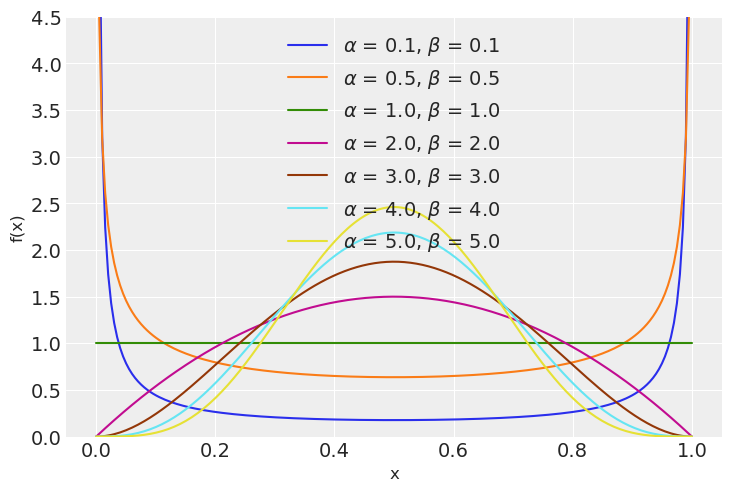

In [9]:
plt.style.use('arviz-darkgrid')
x = np.linspace(0, 1, 200)
alphas = [.1, .5, 1., 2., 3., 4., 5.]
betas =  [.1, .5, 1., 2., 3., 4., 5.]
for a, b in zip(alphas, betas):
    pdf = st.beta.pdf(x, a, b)
    plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.ylim(0, 4.5)
plt.legend(loc=9)
plt.show()

In [14]:
with pm.Model() as model: # context management
    # Step 2: define priors
    # alpha is number of successes, beta is the number of failures - this is a low confidence 50/50
    prior_v1 = pm.Beta('prior_v1', alpha=2, beta=2)
    prior_v2 = pm.Beta('prior_v2', alpha=2, beta=2)

    # Step 1: define likelihood
    # n is number of observations, p is prior distribution, observed is number of clicks
    like_v1 = pm.Binomial('like_v1', n=n, p=prior_v1, observed=obs_v1)
    like_v2 = pm.Binomial('like_v2', n=n, p=prior_v2, observed=obs_v2)
    
    # Step 3: define metrics
    # difference between two versions
    # percentage difference between versions
    pm.Deterministic('difference', prior_v2 - prior_v1)
    pm.Deterministic('relation', (prior_v2/prior_v1) - 1)
    
    # Step 4: inference
    # Defaults to 4 chains of 2000 draws per chain
    trace = pm.sample()
    # trace = pm.sample(draws=50000, step=pm.Metropolis(), start=pm.find_MAP(), progressbar=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [prior_v1, prior_v2]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.


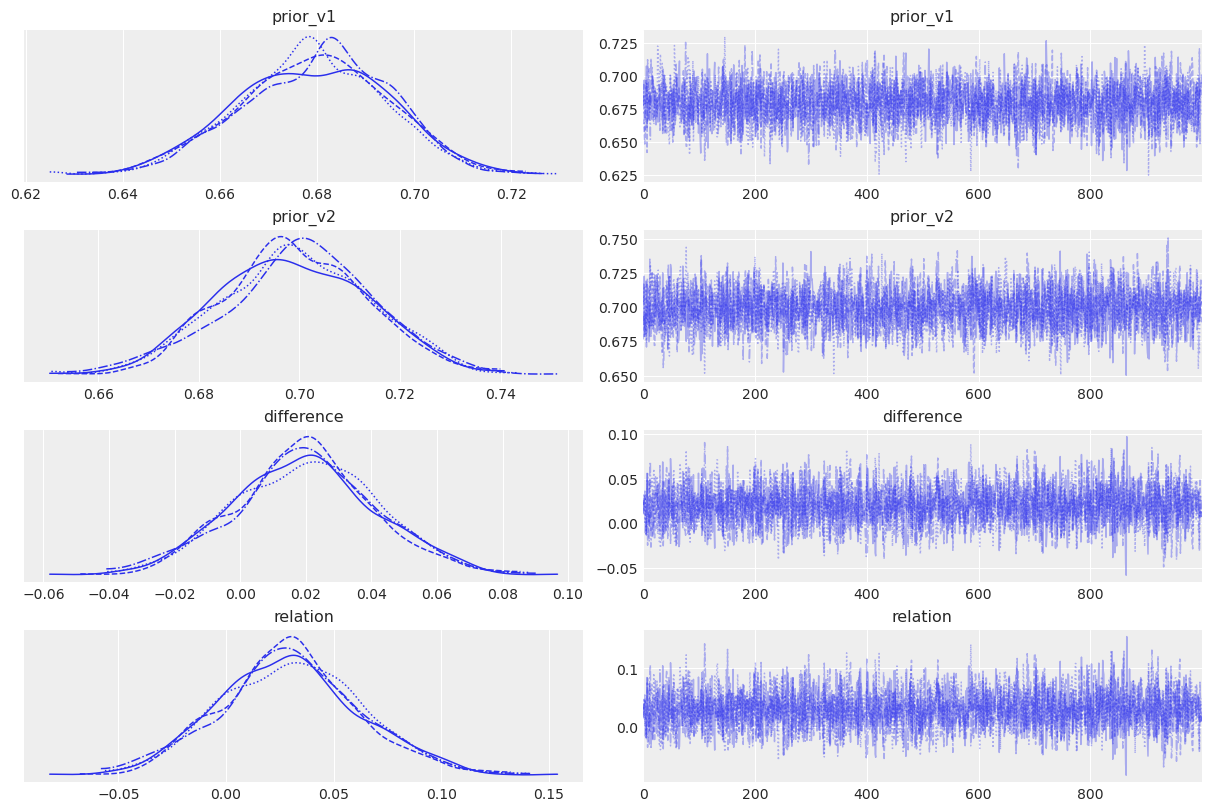

In [44]:
# cannot slice trace to remove first 1000 of sample
pm.plot_trace(trace);

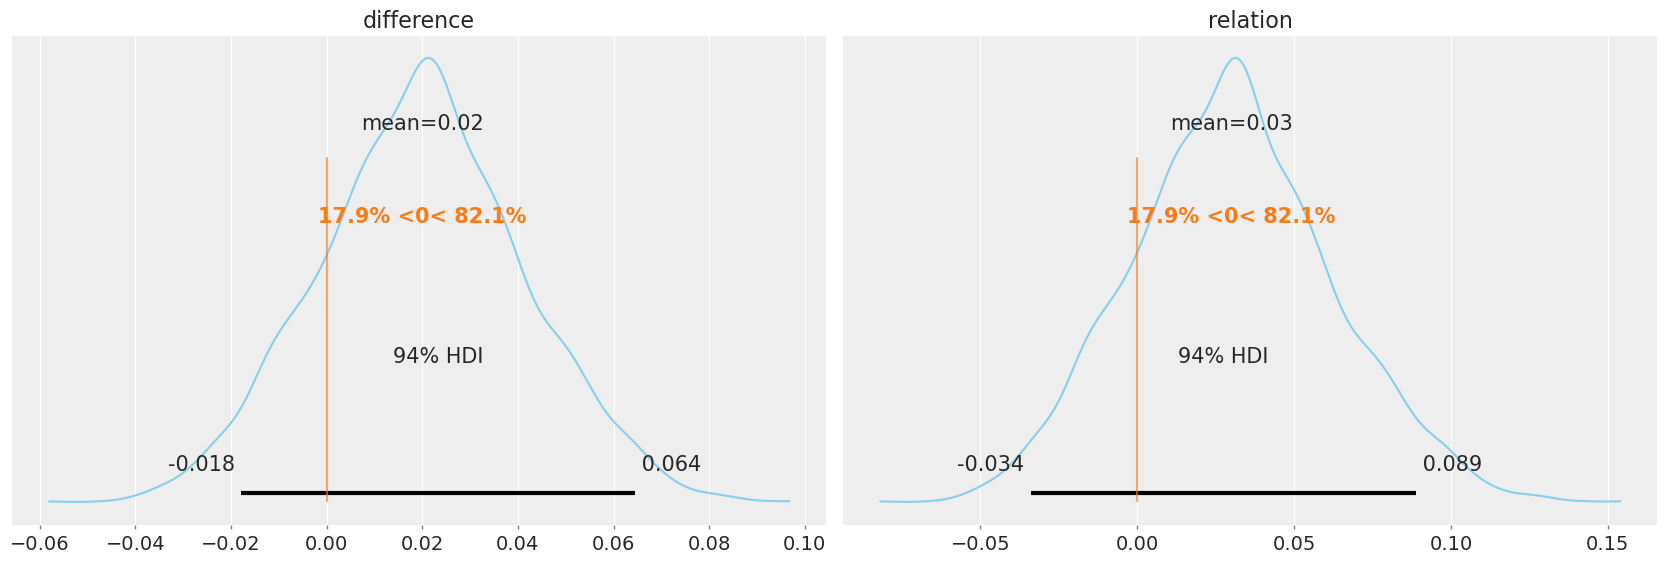

In [52]:
pm.plot_posterior(trace,var_names=['difference','relation'],ref_val=0,color='#87ceeb');

we have 83% confidence that variation 2 is better than variation 1

***
***
***